In [1]:
import altair
import pandas as pd

from libs import AdaptativeConformalClassifier, ConformalClassifier, LGBMultiClassifier
from libs.utils import create_upset_plot, train_calib_valid_split

altair.renderers.enable("svg")

label = "Churn Category"
drop = ["City", "Zip Code", "Latitude", "Longitude", "Customer Status", "Churn Reason"]

df = pd.read_csv("data/telecom_customer_churn.csv", index_col="Customer ID")
df = df.drop(drop, axis=1)
df[label] = df[label].fillna("Stayed")
object_cols = df.select_dtypes("object").columns
df[object_cols] = df[object_cols].astype("category")


train, calib, valid = train_calib_valid_split(df)

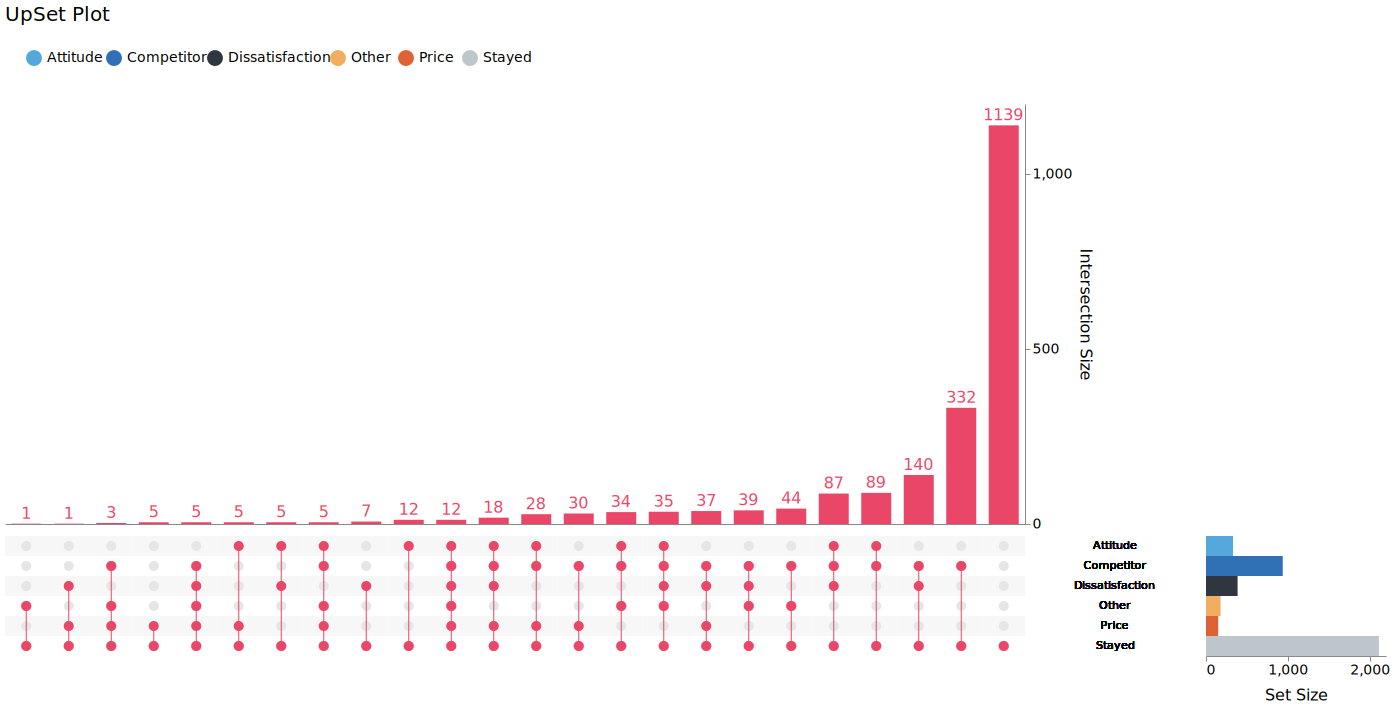

In [2]:
model = LGBMultiClassifier(log_eval_period=0)
conformal_model = ConformalClassifier(model)
conformal_model.train(train, calib, valid, label)
conformal_model.calibrate(calib)
preds = conformal_model.predict(valid)

create_upset_plot(preds.drop("Actuals", axis=1))

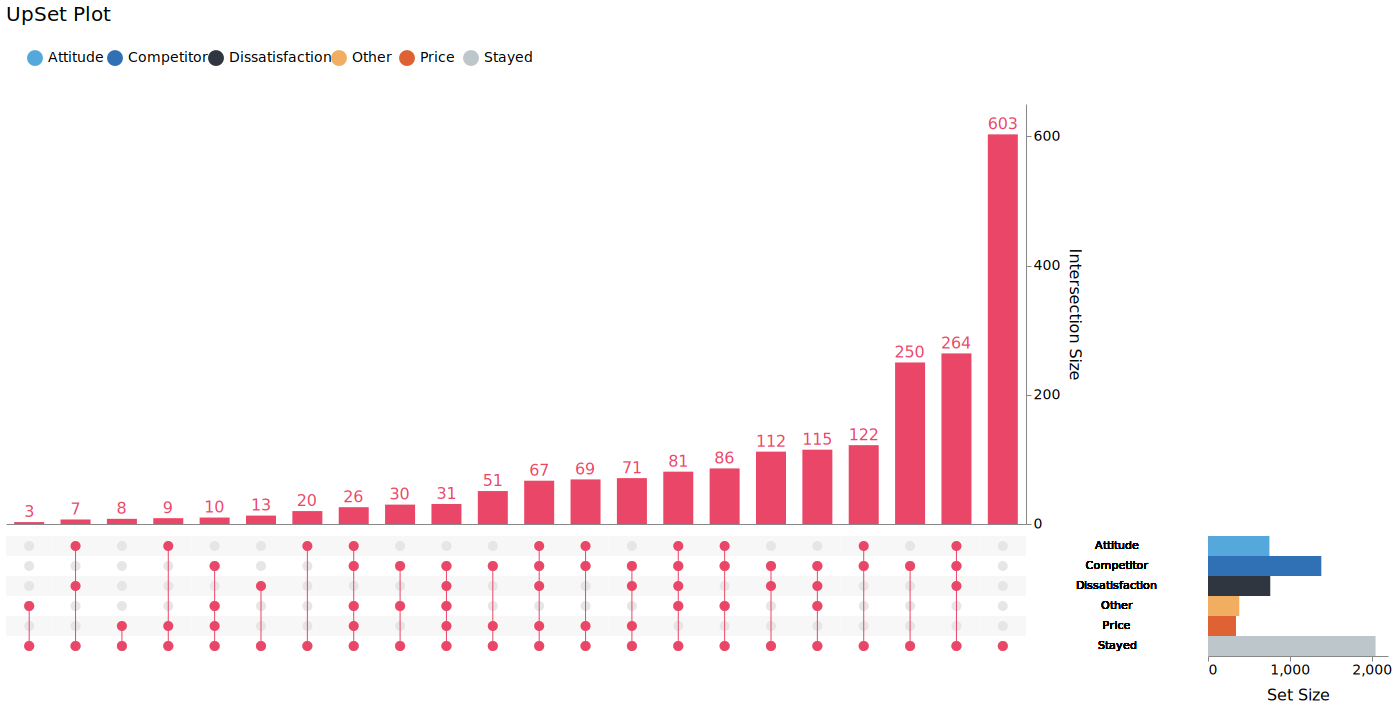

In [3]:
model = LGBMultiClassifier(log_eval_period=0)
conformal_model = AdaptativeConformalClassifier(model)
conformal_model.train(train, calib, valid, label)
conformal_model.calibrate(calib)
preds = conformal_model.predict(valid)

create_upset_plot(preds.drop("Actuals", axis=1))